An Analysis of Ensemble Learning for Cardiovascular Disease (CVD) Risk Prediction

Cardiovascular disease (CVD) is the leading chronic illness and primary cause of morbidity and mortality globally (Li et al., 2024). This stresses the need for strong predictive models to aid and enhance clinical decision-making systems. This analysis presents a systematic process to develop and evaluate machine learning models for CVD risk prediction using a real-world dataset, with an emphasis on clarity, reproducibility, and evidence-based procedures.

The dataset consists of medical information of more than 70,000 individuals with features including age, gender, height, weight, systolic and diastolic blood pressure (ap_hi, ap_lo), cholesterol, glucose, lifestyle factors (smoke, alco, active), and the CVD outcome(cardio).

A first assessment of the data revealed missing values and several biologically impossible entries (out-of-range ages, weight, blood pressure). Structured cleaning was done to identify and drop rows affected by missing values, and rational rules based on medical guidelines on age (30-65 years), systolic BP (90-240mmHg) (Li et al., 2024), were used to remove irrelevant values. A robust 68,147 records and 13 variables were left after cleaning.

Feature engineering was performed on several categorical features to ensure explainability. BMI was calculated and categorized as ‘Underweight’, ‘Healthy’, ‘Overweight’, and ‘Obese’, according to (Adult BMI categories, 2024). AGE was used to group patients into ‘Young adult’ (<= 50 years), and ‘Middle-aged’ (>50 years) per (Yao et al., 2012). Blood Pressure Category was created into groups ‘Non-hypertensive’, ‘Grade 1’, ‘Grade 2’, and ‘Grade 3’ hypertension using (Li et al., 2024). Cholesterol and Glucose were categorized according to normal, above normal, and well above normal, and a binary variable merged smoking, alcohol use, and inactivity into ‘non-healthy lifestyle’ (1 = unhealthy, 0 = healthy).

Exploratory Data Analysis (EDA) was conducted using histograms of important variables to confirm that there were no more outliers and to show realistic distributions. Stacked bar plots were employed to show the relationships between each of the engineered features ‘age_group’, ‘BMI_category’, ‘BP_category’, ‘gender_category’, ‘cholesterol_category’, ‘glucose_category’, ‘non_healthy_lifestyle’, and CVD outcome ‘cardio’. Visualization for ‘cardio’ showed a healthy class balance, ensuring unbiased model training without any need for class balancing techniques.

Two modeling approaches were used for comparison: feature-engineered modeling and basic modeling (using only cleaned, original features). Two ensembles (Random Forest Classifier (RFC) and Gradient Boosting Classifier (GBC), and evaluation metrics (ROC-AUC, Confusion matrix, classification report, and feature importance) were used for each approach. For feature-engineered modeling, categorical variables were dummy encoded to enable ensemble models to train well on them, whilst for basic modeling, Standard Scaler was used to scale the original features. Hyperparameter optimization was performed using GridSearchCV with nested cross-validation using StratifiedKFold to prevent data leakage and maintain class balance. ROC-AUC was used as the main evaluation metric as it reflects overall accuracy and model performance across thresholds (Bradley, 1997). For feature-engineered modeling, ROC-AUC for RFC and GBC were identical at approximately 0.77, while for basic modeling, ROC-AUC for RFC and GBC were also identical at approximately 0.80. These best results achieved with the basic approach show that the original features, after proper cleaning, were highly informative.

Feature importance visualization showed that Systolic (ap_hi) and Diastolic (ap_lo), age, cholesterol, and weight were the strongest predictors, aligning with established CVD risk literature (Li et al., 2024). The basic approach Random Forest model (basic_clf), which was chosen as the best model for this task, achieved an AUC of 0.82, indicating good discriminative ability. Threshold adjustment results showed that at threshold 0.4, recall for high-risk cases (CVD=1) was maximized at 0.78, minimizing missed diagnoses. At 0.6 threshold, precision for high-risk cases increased, but more true positives were missed. A threshold of 0.4 is recommended for patient risk stratification as it prioritizes patient safety and minimizes missed diagnoses. The good balance of recall for high-risk (0.78) and low-risk (0.69) is the best for this task.

These findings show that ensemble learning, especially Random Forest and Gradient Boosting, are strong tools for clinical risk prediction. The higher performance of basic modeling using only preprocessed data shows that with proper cleaning, original features are enough to generate accurate predictions. Feature engineering adds comprehensibility and clinical insight, which can be useful in certain scenarios. Threshold adjustment is essential as a lower threshold of 0.4 increases sensitivity and is good for preventive care, while a higher threshold of 0.6 is good for situations where false positives carry significant cost.

This methodology shows that proper data cleaning, systematic feature selection, robust cross-validation, and insightful evaluation are all important for reproducible and interpretable machine learning in healthcare.

This task successfully designed and implemented ensemble models for CVD risk prediction, achieving high ROC-AUC and balanced prediction performance for both high and low risk individuals.

References

Li, Q. et al. (2024) 'Re-evaluating cardiovascular risk in systolic-dominant, diastolic-dominant and parallelly-elevated hypertension: insights from northeast rural cardiovascular health study,' Scientific Reports, 14(1). https://doi.org/10.1038/s41598-024-79189-2.

Adult BMI categories (2024). https://www.cdc.gov/bmi/adult-calculator/bmi-categories.html.

World Health Organization: WHO (2021) Cardiovascular diseases (CVDs). https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds).

Yao, X.-Y. et al. (2012) 'Age- and Gender-Specific Prevalence of Risk Factors in Patients with First-Ever Ischemic Stroke in China,' Stroke Research and Treatment, 2012, pp. 1–6. https://doi.org/10.1155/2012/136398.

Bradley, A.P. (1997) 'The use of the area under the ROC curve in the evaluation of machine learning algorithms,' Pattern Recognition, 30(7), pp. 1145–1159. https://doi.org/10.1016/s0031-3203(96)00142-2.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier 
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report

df = pd.read_csv('CVD.csv')
df.info() ## To check data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70014 entries, 0 to 70013
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70014 non-null  int64  
 1   age          70012 non-null  float64
 2   gender       70012 non-null  float64
 3   height       70012 non-null  float64
 4   weight       70011 non-null  float64
 5   ap_hi        70012 non-null  float64
 6   ap_lo        70010 non-null  float64
 7   cholesterol  70011 non-null  float64
 8   gluc         70012 non-null  float64
 9   smoke        70013 non-null  float64
 10  alco         70012 non-null  float64
 11  active       70011 non-null  float64
 12  cardio       70014 non-null  int64  
dtypes: float64(11), int64(2)
memory usage: 6.9 MB


In [2]:
df.head ## To check data structure

<bound method NDFrame.head of           id      age  gender  height  weight  ap_hi  ap_lo  cholesterol  \
0          0  18393.0     2.0   168.0    62.0  110.0   80.0          1.0   
1          1  20228.0     1.0   156.0    85.0  140.0   90.0          3.0   
2          2  18857.0     1.0   165.0    64.0  130.0   70.0          3.0   
3          3  17623.0     2.0   169.0    82.0  150.0  100.0          1.0   
4          4  17474.0     1.0   156.0    56.0  100.0   60.0          1.0   
...      ...      ...     ...     ...     ...    ...    ...          ...   
70009  99993  19240.0     2.0   168.0    76.0  120.0   80.0          1.0   
70010  99995  22601.0     1.0   158.0   126.0  140.0   90.0          2.0   
70011  99996  19066.0     2.0   183.0   105.0  180.0   90.0          3.0   
70012  99998  22431.0     1.0   163.0    72.0  135.0   80.0          1.0   
70013  99999  20540.0     1.0   170.0    72.0  120.0   80.0          2.0   

       gluc  smoke  alco  active  cardio  
0       1.0   

In [3]:
df.isnull().sum() ## Check for missing values

id             0
age            2
gender         2
height         2
weight         3
ap_hi          2
ap_lo          4
cholesterol    3
gluc           2
smoke          1
alco           2
active         3
cardio         0
dtype: int64

In [4]:
df = df.dropna() ## Drop all rows with missing values
df.shape

(69990, 13)

In [5]:
## To check for biologically impossible/out of range/abnormal values in the dataset
num_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
for col in num_cols:
    print(f'{col}:')
    print('Min:', df[col].min())
    print('Max:', df[col].max())
    print('Unique values (first 10):', df[col].unique()[:10])
    print()

age:
Min: 10798.0
Max: 202113.0
Unique values (first 10): [ 18393.  20228.  18857.  17623.  17474.  21914.  22113. 202113.  22584.
  17668.]

height:
Min: 55.0
Max: 468.0
Unique values (first 10): [168. 156. 165. 169. 151. 157. 357. 178. 158. 164.]

weight:
Min: 10.0
Max: 650.0
Unique values (first 10): [62. 85. 64. 82. 56. 67. 93. 13. 95. 71.]

ap_hi:
Min: -150.0
Max: 16020.0
Unique values (first 10): [110. 140. 130. 150. 100. 120. 145. 230. 170. 135.]

ap_lo:
Min: -70.0
Max: 11000.0
Unique values (first 10): [ 80.  90.  70. 100.  60.  85. 270.  89. 110. 280.]



In [6]:
## To check for the count of biologically impossible/out of range/abnormal values in key numerical columns using acceptable medical ranges 
out_of_range_counts = {}

## For Age acceptable range (10950 - 44000 days)
out_of_range_counts['age'] = ((df['age'] < 10950) | (df['age'] > 44000)).sum() 

## For Height acceptable range (140 - 210 cm)
out_of_range_counts['height'] = ((df['height'] < 140) | (df['height'] > 210)).sum()

## For weight acceptable range (40 - 200 kg)
out_of_range_counts['weight'] = ((df['weight'] < 40) | (df['weight'] > 200)).sum()

## For systolic blood pressure (ap_hi) acceptable range (80 - 250 mmHg)
out_of_range_counts['ap_hi'] = ((df['ap_hi'] < 80) | (df['ap_hi'] > 250)).sum()

## For diastolic blood pressure (ap_lo) acceptable range (50 - 200 mmHg)
out_of_range_counts['ap_lo'] = ((df['ap_lo'] < 50) | (df['ap_lo'] > 200)).sum() 

## Systolic bp (ap_hi) should be higher than Diastolic bp 
out_of_range_counts['ap_hi_not_higher_than_ap_lo']= (df['ap_hi'] <= df['ap_lo']).sum() 

for feature, count in out_of_range_counts.items():
    print(f'{feature}: {count}')

age: 10
height: 175
weight: 352
ap_hi: 251
ap_lo: 1036
ap_hi_not_higher_than_ap_lo: 1238


In [7]:
## To remove out of range/ abnormal values in numerical columns
df = df[(df['age'] >= 10950) & (df['age'] <= 44000)]
df = df[(df['height'] >= 140) & (df['height'] <= 210)]
df = df[(df['weight'] >= 40) & (df['weight'] <= 200)]
df = df[(df['ap_hi'] >= 80) & (df['ap_hi'] <= 250)]
df = df[(df['ap_lo'] >= 50) & (df['ap_lo'] <= 200)]
df = df[df['ap_hi'] > df['ap_lo']]

print(df.shape)

(68147, 13)


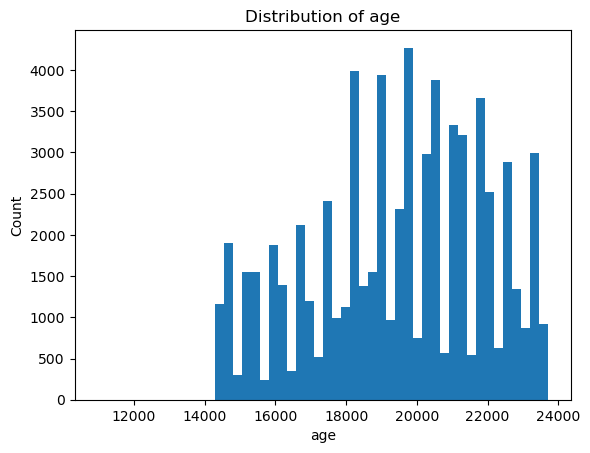

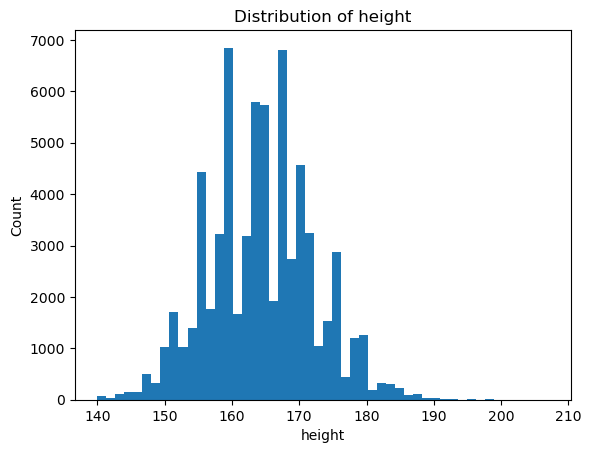

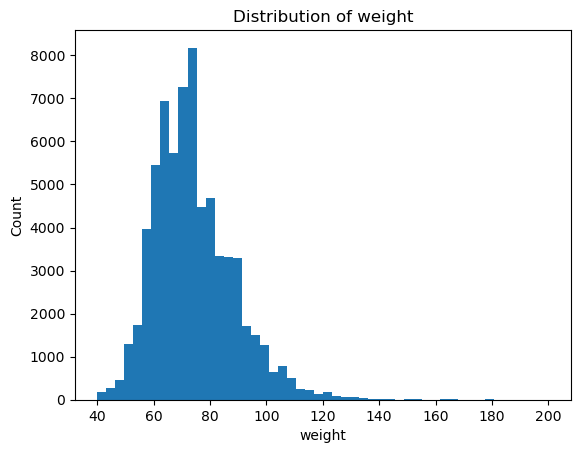

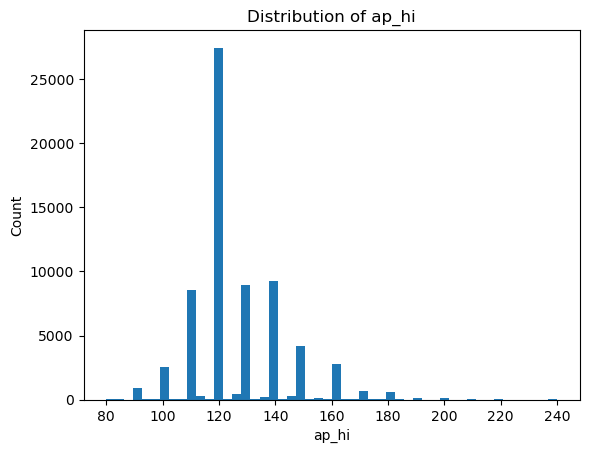

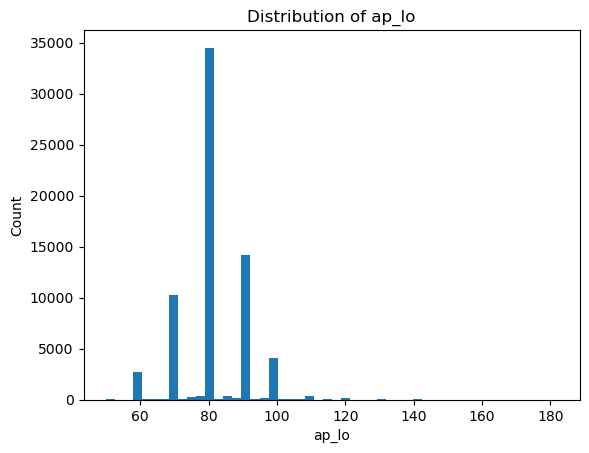

In [8]:
## Plot of the distributions of these key variables to visually confirm that outliers are gone
num_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

for col in num_cols:
    plt.hist(df[col], bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [9]:
## Creating a new column for age in years for better understanding
df['age_in_years'] = (df['age'] // 365).astype(int)
df = df[df['age_in_years'] > 30] ## Filter age to fit coursework requirement of adults above 30 years

## Print out the distribution summary of the new age column
print(df['age_in_years'].describe()) 

count    68146.000000
mean        52.828457
std          6.765975
min         39.000000
25%         48.000000
50%         53.000000
75%         58.000000
max         64.000000
Name: age_in_years, dtype: float64


APPROACH 1: Using domain-specific insights for feature selection and engineering to solve the task

In [10]:
## To calculate BMI= WEIGHT (KG)/HEIGHT (M)
df['height_in_meters'] = df['height'] / 100 ## Convert height from centimeters to meters to be able to calculate BMI
df['BMI'] = df['weight'] / (df['height_in_meters'] ** 2)


In [11]:
## Categorizing BMI according to CDC BMI categories for adults, 2024
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Healthy Weight'
    elif bmi <30:
        return 'Overweight'
    else:
        return 'Obese'

df['BMI_category'] = df['BMI'].apply(bmi_category)
print(df['BMI_category'].value_counts())



BMI_category
Healthy Weight    25308
Overweight        24485
Obese             17759
Underweight         594
Name: count, dtype: int64


In [12]:
## Categorizing Age according to Yao et al, 2012
def age_group(age):
    if 31 <= age <= 50:
        return 'Young Adult'
    elif 50 <= age <= 80:
        return 'Middle-aged'
    else:
        return 'Very Old'

df['age_group'] = df['age_in_years'].apply(age_group)
print(df['age_group'].value_counts())

age_group
Middle-aged    44109
Young Adult    24037
Name: count, dtype: int64


In [13]:
## Categorizing Blood Pressure wrt grades and pattern according to the Wang et al, 2024
def bp_category(row):
    sbp = row['ap_hi']
    dbp = row['ap_lo']
    if sbp < 140 and dbp < 90:
        return 'Non-Hypertensive'
    elif (140 <= sbp < 160) or (90 <= dbp < 100):
        return 'Grade 1 Hypertension'
    elif (160 <= sbp < 180) or (100 <= dbp < 110):
        return 'Grade 2 Hypertension'
    elif sbp >= 180 or dbp >= 110:
        return 'Grade 3 Hypertension'
    else:
        return 'Other'

df['BP_category'] = df.apply(bp_category, axis=1)
print(df['BP_category'].value_counts())

BP_category
Non-Hypertensive        44770
Grade 1 Hypertension    20111
Grade 2 Hypertension     2947
Grade 3 Hypertension      318
Name: count, dtype: int64


In [14]:
## Categorizing gender 
gender_cat = {1: 'Female', 2: 'Male'}
df['gender_category'] = df['gender'].map(gender_cat)
print(df['gender_category'].value_counts())

gender_category
Female    44358
Male      23788
Name: count, dtype: int64


In [15]:
## Categorizing cholesterol and glucose columns
chol_cat = {1: 'Normal', 2: 'Above normal', 3: 'Well above normal'}
df['cholesterol_category'] = df['cholesterol'].map(chol_cat)
df['glucose_category'] = df['gluc'].map(chol_cat)

print(df['cholesterol_category'].value_counts())
print(df['glucose_category'].value_counts())

cholesterol_category
Normal               51102
Above normal          9232
Well above normal     7812
Name: count, dtype: int64
glucose_category
Normal               57944
Well above normal     5173
Above normal          5029
Name: count, dtype: int64


In [16]:
## Categorize Non-healthy lifestyle wrt smoking and drinking alcohol
df['non_healthy_lifestyle'] = ((df['smoke'] == 1) | (df['alco'] == 1)).astype(int)
print(df['non_healthy_lifestyle'].value_counts())

non_healthy_lifestyle
0    60301
1     7845
Name: count, dtype: int64


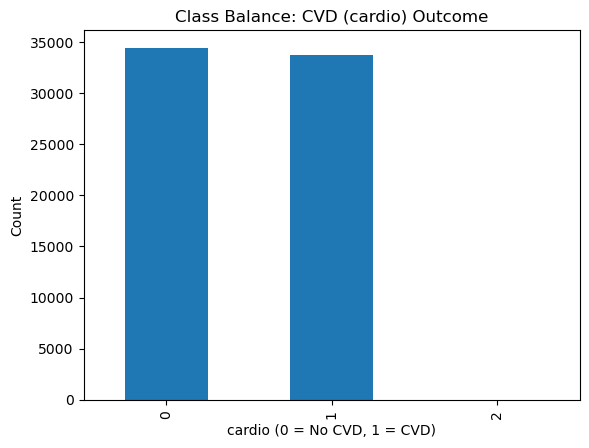

In [17]:
## EDA to show class balance of target variable CVD
df['cardio'].value_counts().plot(kind='bar')
plt.title('Class Balance: CVD (cardio) Outcome')
plt.xlabel('cardio (0 = No CVD, 1 = CVD)')
plt.ylabel('Count')
plt.show()

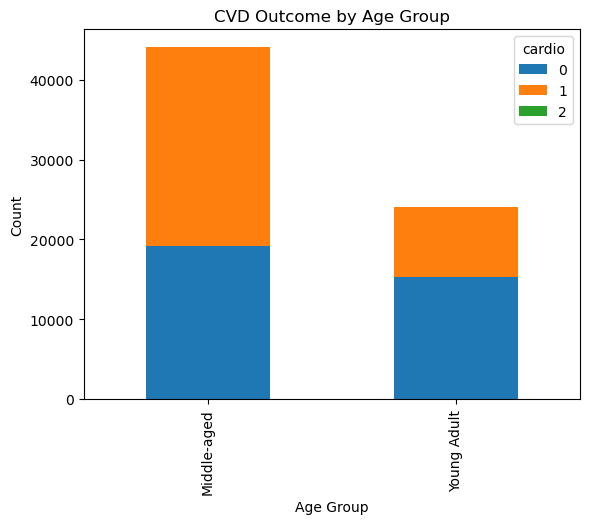

In [18]:
## Age distribution by CVD 
pd.crosstab(df['age_group'], df['cardio']).plot(kind='bar', stacked=True)
plt.title('CVD Outcome by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

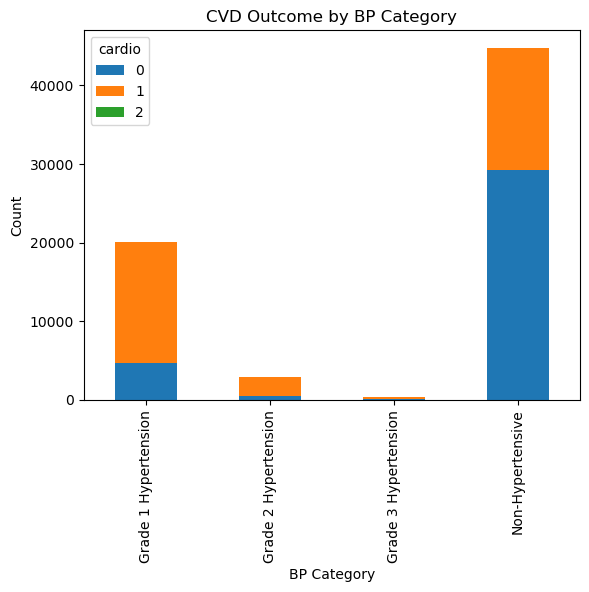

In [19]:
## BP Category vs CVD
pd.crosstab(df['BP_category'],df['cardio']).plot(kind='bar', stacked=True)
plt.title('CVD Outcome by BP Category')
plt.xlabel('BP Category')
plt.ylabel('Count')
plt.show()

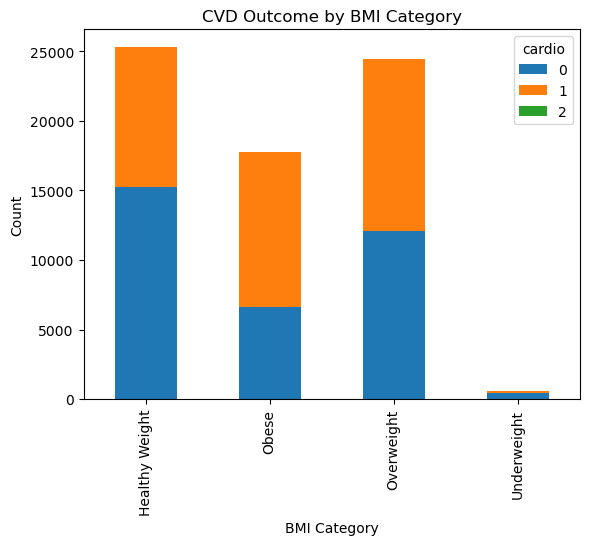

In [20]:
## BMI Category vs CVD
pd.crosstab(df['BMI_category'],df['cardio']).plot(kind='bar', stacked=True)
plt.title('CVD Outcome by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.show()

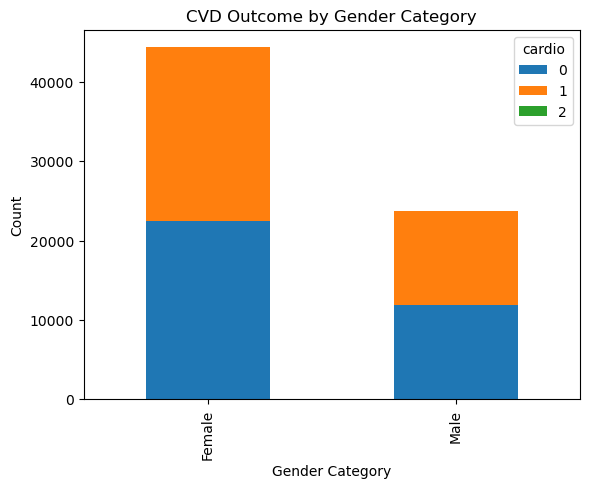

In [21]:
## Gender Category vs CVD
pd.crosstab(df['gender_category'], df['cardio']).plot(kind='bar', stacked=True)
plt.title('CVD Outcome by Gender Category')
plt.xlabel('Gender Category')
plt.ylabel('Count')
plt.show()

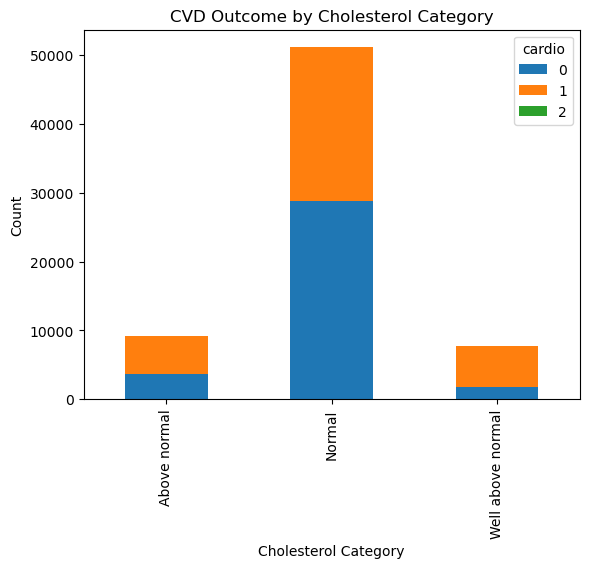

In [22]:
## Cholesterol Category vs CVD 
pd.crosstab(df['cholesterol_category'], df['cardio']).plot(kind='bar', stacked=True)
plt.title('CVD Outcome by Cholesterol Category')
plt.xlabel('Cholesterol Category')
plt.ylabel('Count')
plt.show()

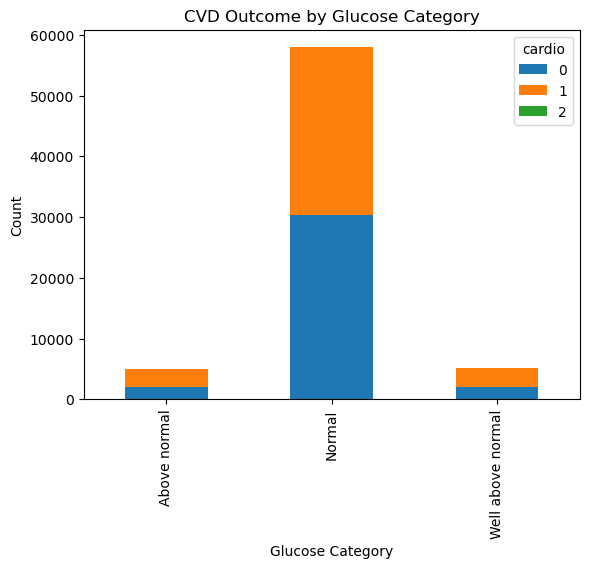

In [23]:
## Glucose Category vs CVD
pd.crosstab(df['glucose_category'], df['cardio']).plot(kind='bar', stacked=True)
plt.title('CVD Outcome by Glucose Category')
plt.xlabel('Glucose Category')
plt.ylabel('Count')
plt.show()

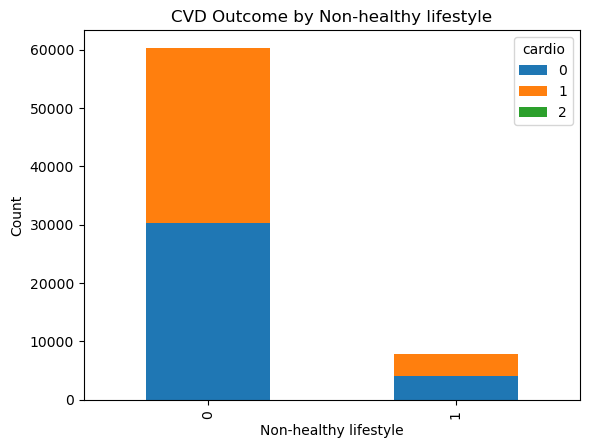

In [24]:
pd.crosstab(df['non_healthy_lifestyle'], df['cardio']).plot(kind='bar', stacked=True)
plt.title('CVD Outcome by Non-healthy lifestyle')
plt.xlabel('Non-healthy lifestyle')
plt.ylabel('Count')
plt.show()

In [25]:
## Select features for split
features = ['age_group', 'BMI_category', 'BP_category', 'gender_category', 'cholesterol_category', 'glucose_category', 'non_healthy_lifestyle']
X = pd.get_dummies(df[features])
y = df['cardio']

In [26]:
## Using two ensembles for modelling and defining a parameter grid for Random Forest Classifier (RFC)
rf_p_grid = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}

## Using Stratified K fold to keep class proportions balanced
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
outer_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

clf = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=rf_p_grid, cv=inner_cv, n_jobs=-1, scoring='roc_auc') ## roc_auc to calculate accuracy

rf_nested_score = cross_val_score(clf, X, y, cv=outer_cv, scoring='roc_auc', n_jobs=-1)

print('Random Forest nested score:', rf_nested_score)
print('Average nested score:', rf_nested_score.mean())

Random Forest nested score: [nan nan nan]
Average nested score: nan


In [27]:
## NaN result from nested score requires a closer look at the data to make sure that the Y variable is binary
print(y.unique())
print(y.value_counts())
print(y.isnull().sum())

[0 1 2]
cardio
0    34430
1    33712
2        4
Name: count, dtype: int64
0


In [28]:
## Drop the 4 rows with class=2
df = df[df['cardio'].isin([0, 1])].copy()
y = df['cardio']

In [29]:
## Running Random forest (RFC) again after fixing y
features = ['age_group', 'BMI_category', 'BP_category', 'gender_category', 'cholesterol_category', 'glucose_category', 'non_healthy_lifestyle']
X = pd.get_dummies(df[features])
y = df['cardio']

In [30]:
## Define parameter grid for Random Forest Classifier (RFC)
rf_p_grid = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}

## Using Stratified K-fold to keep class proportions balanced
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
outer_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

clf = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=rf_p_grid, cv=inner_cv, n_jobs=-1, scoring='roc_auc') ## roc_auc to calculate accuracy

rf_nested_score = cross_val_score(clf, X, y, cv=outer_cv, scoring='roc_auc', n_jobs=-1)

print('Random Forest nested score:', rf_nested_score)

Random Forest nested score: [0.76657569 0.76995587 0.76679095]


In [31]:
## Fit RFC model into X, y
clf.fit(X,y)
print('After inner CV...')
print(clf.best_params_)
print(clf.best_score_)

After inner CV...
{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
0.7678244663911289


In [32]:
## For gradient boosting classifier (GBC)
## Define parameter grid for GBC
gb_p_grid = {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1],'max_depth': [3, 5], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}

## Using Stratified K fold to keep class proportions balanced
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
outer_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

gb_clf = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42), param_grid=gb_p_grid, cv=inner_cv, n_jobs=-1, scoring='roc_auc') ## roc_auc to calculate accuracy

gb_nested_score = cross_val_score(gb_clf, X, y, cv=outer_cv, scoring='roc_auc', n_jobs=-1)

print('Gradient Boosting nested score:', gb_nested_score)

Gradient Boosting nested score: [0.76878454 0.77081578 0.76940239]


In [33]:
## Fit GBC model into X, y
gb_clf.fit(X,y)
print('After inner CV...')
print(gb_clf.best_params_)
print(gb_clf.best_score_)

After inner CV...
{'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
0.7697254916259055


Approach 1: Ensemble analysis with feature engineering has a possible best score of approximately 0.77, so I'll consider a second approach.

APPROACH 2: Using preprocessed variables only to train models on data

In [34]:
## Select columns for task
basic_features = ['age_in_years', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'gender']
X_basic = df[basic_features].copy()
y_basic = df['cardio'] 

In [35]:
## Scale and train models: First model, Random Forest Classifier
scaler = StandardScaler()
X_scaled_basic = scaler.fit_transform(X_basic)

basic_rf_p_grid = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}

## Using Stratified K fold to keep class proportions balanced
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
outer_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

basic_clf = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=basic_rf_p_grid, cv=inner_cv, n_jobs=-1, scoring='roc_auc') ## roc_auc to calculate accuracy

basic_rf_nested_score = cross_val_score(basic_clf, X_basic, y_basic, cv=outer_cv, scoring='roc_auc', n_jobs=-1)

print('Basic Random Forest nested score:', basic_rf_nested_score)

Basic Random Forest nested score: [0.80198862 0.80138584 0.79729325]


In [36]:
basic_clf.fit(X_basic,y_basic)
print('After inner CV...')
print(basic_clf.best_params_)
print(basic_clf.best_score_)

After inner CV...
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
0.8003820659881399


In [37]:
## Using Second model Gradient Boosting Classifier (GBC)
basic_gb_p_grid = {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1],'max_depth': [3, 5], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}

## Using Stratified K fold to keep class proportions balanced
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
outer_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

basic_gb_clf = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42), param_grid=basic_gb_p_grid, cv=inner_cv, n_jobs=-1, scoring='roc_auc') ## roc_auc to calculate accuracy

basic_gb_nested_score = cross_val_score(basic_gb_clf, X_basic, y_basic, cv=outer_cv, scoring='roc_auc', n_jobs=-1)

print('Basic Gradient Boosting nested score:', basic_gb_nested_score)

Basic Gradient Boosting nested score: [0.80247516 0.80225118 0.79862952]


In [38]:
basic_gb_clf.fit(X_basic,y_basic)
print('After inner CV...')
print(basic_gb_clf.best_params_)
print(basic_gb_clf.best_score_) 

After inner CV...
{'learning_rate': 0.05, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
0.8013509846594439


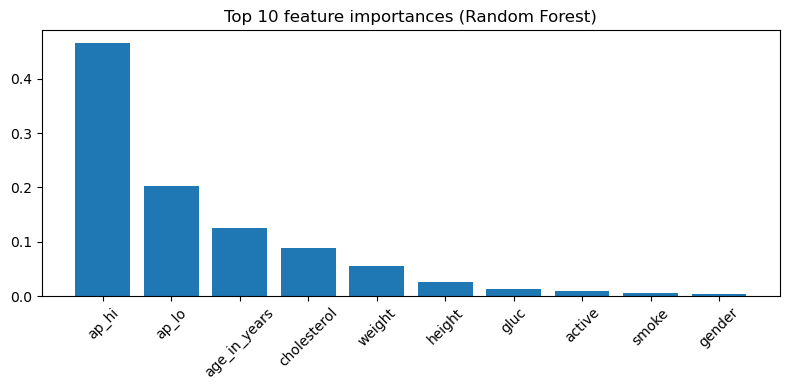

In [39]:
## To interpret and demonstrate the best model (RFC without feature engineering) performance in terms of risk stratification (low/high) 
## Feature importance
importances = basic_clf.best_estimator_.feature_importances_
feature_names = X_basic.columns
indices = np.argsort(importances)[::-1][:10]

plt.figure(figsize=(8, 4))
plt.title('Top 10 feature importances (Random Forest)')
plt.bar(range(10), importances[indices], align='center')
plt.xticks(range(10), feature_names[indices], rotation=45)
plt.tight_layout()
plt.show()

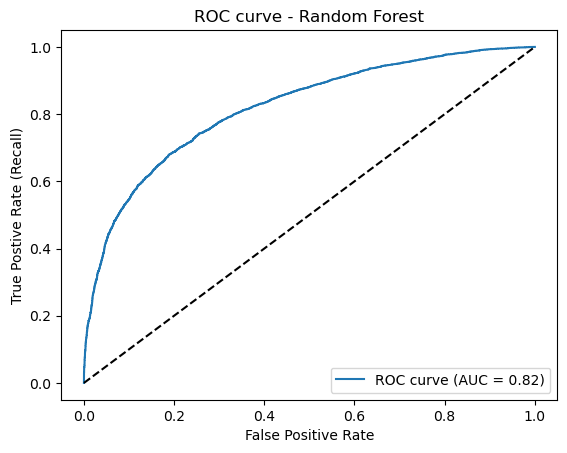

In [40]:
## ROC Curve
X_train, X_test, y_train, y_test = train_test_split(X_basic, y_basic, test_size=0.2, stratify=y_basic, random_state=42)
y_prob = basic_clf.best_estimator_.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Postive Rate (Recall)')
plt.title('ROC curve - Random Forest')
plt.legend(loc='lower right')
plt.show()

In [41]:
y_pred =(y_prob >= 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix (0.5 threshold):\n', cm)
print(classification_report(y_test, y_pred))

Confusion Matrix (0.5 threshold):
 [[5542 1344]
 [2132 4611]]
              precision    recall  f1-score   support

           0       0.72      0.80      0.76      6886
           1       0.77      0.68      0.73      6743

    accuracy                           0.74     13629
   macro avg       0.75      0.74      0.74     13629
weighted avg       0.75      0.74      0.74     13629



In [42]:
## By default, classifiers use a threshold of 0.5 (predict CVD if probability >= 0.5), so I will try different thresholds to customize the model's ability to predict high-risk and low-risk
thresholds = [0.4, 0.5, 0.6]
for thresh in thresholds:
    thresh_y_pred = (y_prob >= thresh).astype(int)
    print(f"\n--- Threshold: {thresh} ---")
    cm = confusion_matrix(y_test, thresh_y_pred)
    print('Confusion Matrix:\n', cm)
    print(classification_report(y_test, thresh_y_pred))


--- Threshold: 0.4 ---
Confusion Matrix:
 [[4744 2142]
 [1454 5289]]
              precision    recall  f1-score   support

           0       0.77      0.69      0.73      6886
           1       0.71      0.78      0.75      6743

    accuracy                           0.74     13629
   macro avg       0.74      0.74      0.74     13629
weighted avg       0.74      0.74      0.74     13629


--- Threshold: 0.5 ---
Confusion Matrix:
 [[5542 1344]
 [2132 4611]]
              precision    recall  f1-score   support

           0       0.72      0.80      0.76      6886
           1       0.77      0.68      0.73      6743

    accuracy                           0.74     13629
   macro avg       0.75      0.74      0.74     13629
weighted avg       0.75      0.74      0.74     13629


--- Threshold: 0.6 ---
Confusion Matrix:
 [[6009  877]
 [2722 4021]]
              precision    recall  f1-score   support

           0       0.69      0.87      0.77      6886
           1       0.82    